In [2]:
'''
This Project analyses the differnece in behavior between TESLA, FORD and GM in a given period. 
Stock volatility, daily returns, cumulative daily returns are all compared. Candle scik plots using plotly are provided.
Fnally, correlations are assessed and outlined

by Kieran O'Donnell 20/04/2020
'''

In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [7]:
#Importing stock info for Tesla, Ford and GM between 01/01/2012 and 01/01/2017
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)
TSLA = data.DataReader("TSLA", 'yahoo', start, end)
F = data.DataReader("F", 'yahoo', start, end)
GM = data.DataReader("GM", 'yahoo', start, end)

In [8]:
tickers = ["TSLA", "F", "GM"]#Using tickers to combine into one big df

In [9]:
car_stocks=pd.concat([TSLA,F,GM], axis =1, keys=tickers)
car_stocks.columns.names = ['Car Tickers','Stock Info']

In [10]:
car_stocks.head()

Car Tickers       TSLA                                                       \
Stock Info        High        Low       Open      Close   Volume  Adj Close   
Date                                                                          
2012-01-03   29.500000  27.650000  28.940001  28.080000   928100  28.080000   
2012-01-04   28.670000  27.500000  28.209999  27.709999   630100  27.709999   
2012-01-05   27.930000  26.850000  27.760000  27.120001  1005500  27.120001   
2012-01-06   27.790001  26.410000  27.200001  26.910000   986300  26.910000   
2012-01-09   27.490000  26.120001  27.000000  27.250000   897000  27.250000   

Car Tickers      F                                                    GM  \
Stock Info    High    Low   Open  Close      Volume Adj Close       High   
Date                                                                       
2012-01-03   11.25  10.99  11.00  11.13  45709900.0  7.687118  21.180000   
2012-01-04   11.53  11.07  11.15  11.30  79725200.0  7.804530  21.370001   
2012-01-05   11.63  11.24  11.33  11.59  67877500.0  8.004824  22.290001   
2012-01-06   11.80  11.52  11.74  11.71  59840700.0  8.087703  23.030001   
2012-01-09   11.95  11.70  11.83  11.80  53981500.0  8.149862  23.430000   

Car Tickers                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2012-01-03   20.750000  20.830000  21.049999   9321300.0  16.103352  
2012-01-04   20.750000  21.049999  21.150000   7856700.0  16.179853  
2012-01-05   20.959999  21.100000  22.170000  17880600.0  16.960161  
2012-01-06   22.240000  22.260000  22.920000  18234500.0  17.533915  
2012-01-09   22.700001  23.200001  22.840000  12084500.0  17.472712

Text(0.5, 1.0, 'Open Price')

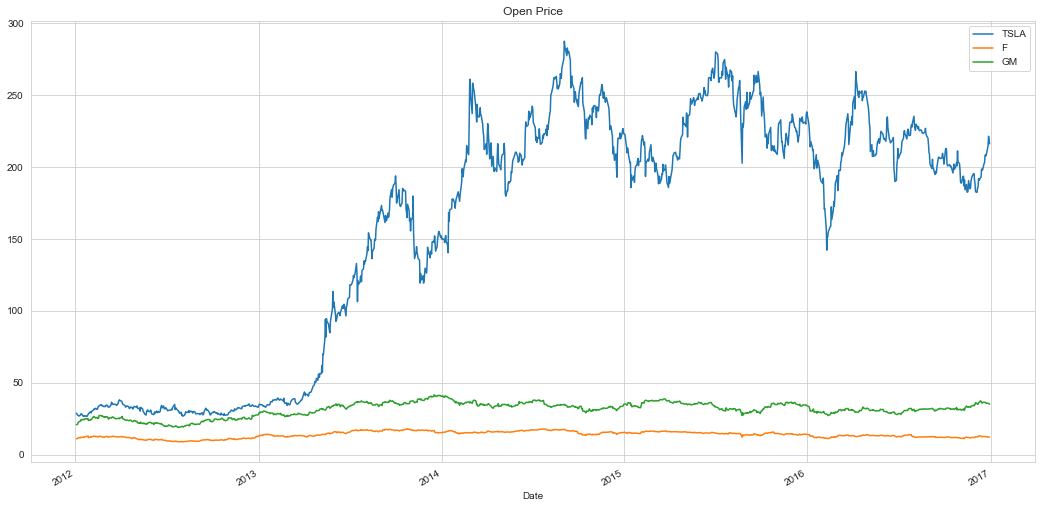

In [11]:
#Comparing each stock's opening price
plt.figure(figsize=(18,9))
TSLA['Open'].plot(label='TSLA')
F['Open'].plot(label='F')
GM['Open'].plot(label='GM')
label = plt.legend()
plt.title('Open Price')

Text(0.5, 1.0, 'Traded Volume')

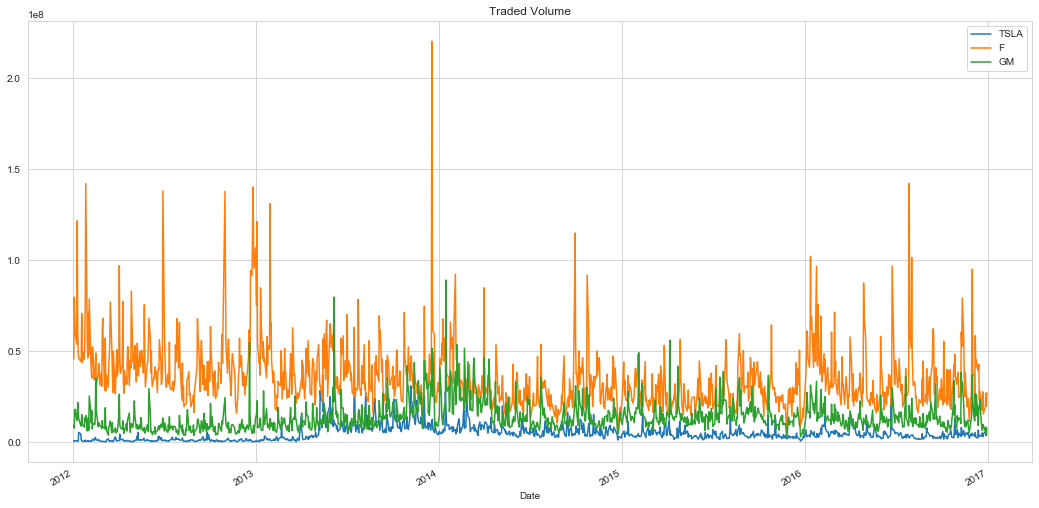

In [12]:
#Comparing each stock's traded volume
plt.figure(figsize=(18,9))
TSLA['Volume'].plot(label='TSLA')
F['Volume'].plot(label='F')
GM['Volume'].plot(label='GM')
label = plt.legend()
plt.title('Traded Volume')

In [13]:
#Looking at Ford trading maxium in late 2013
F['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [14]:
#https://money.cnn.com/2013/12/18/news/companies/ford-profit/index.html - 
#There was a massive sell off as company stated it would hurt profits next year

In [15]:
#To look at something relating to TSLA's market stock, we make a 'Total Traded' Column.
#This is still not euqal to market cap

In [16]:
TSLA['Total Traded'] = TSLA['Open']*TSLA['Volume']
F['Total Traded'] = F['Open']*F['Volume']
GM['Total Traded'] = GM['Open']*GM['Volume']

Text(0.5, 1.0, 'Total Traded')

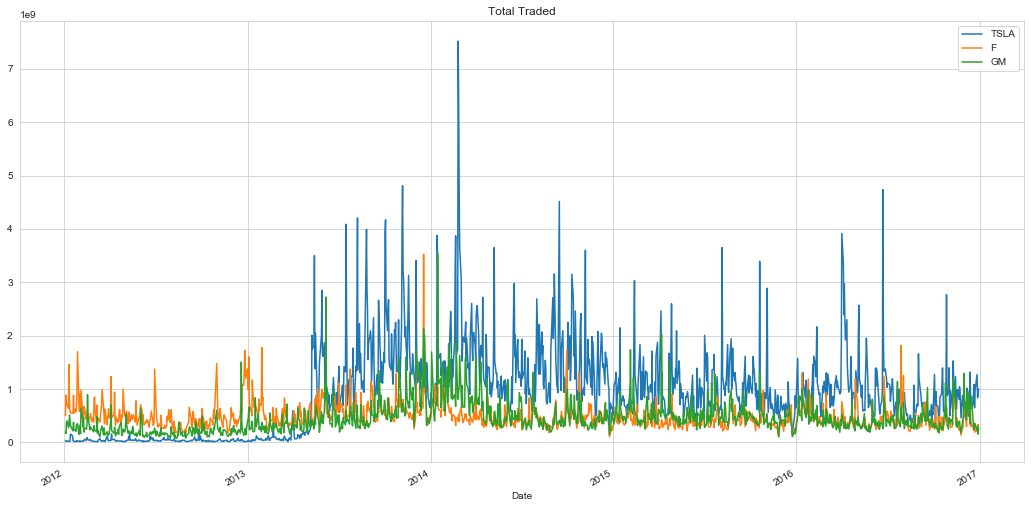

In [17]:
#Now to plot total traded vs time index
#Comparing each stock's traded volume
plt.figure(figsize=(18,9))
TSLA['Total Traded'].plot(label='TSLA')
F['Total Traded'].plot(label='F')
GM['Total Traded'].plot(label='GM')
label = plt.legend()
plt.title('Total Traded')

In [18]:
#Investigating the huge TSLA spike in early 2014:
TSLA['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

In [19]:
#"Morgan Stanley raised its price target for TSLA. 
#Shares of the electric car maker had doubled in the past month."
#https://www.fool.com/investing/general/2013/05/14/is-tesla-overvalued.aspx

In [20]:
#Plotting moving averages:

Text(0.5, 1.0, 'GM Daily vs Opening Moving Averages')

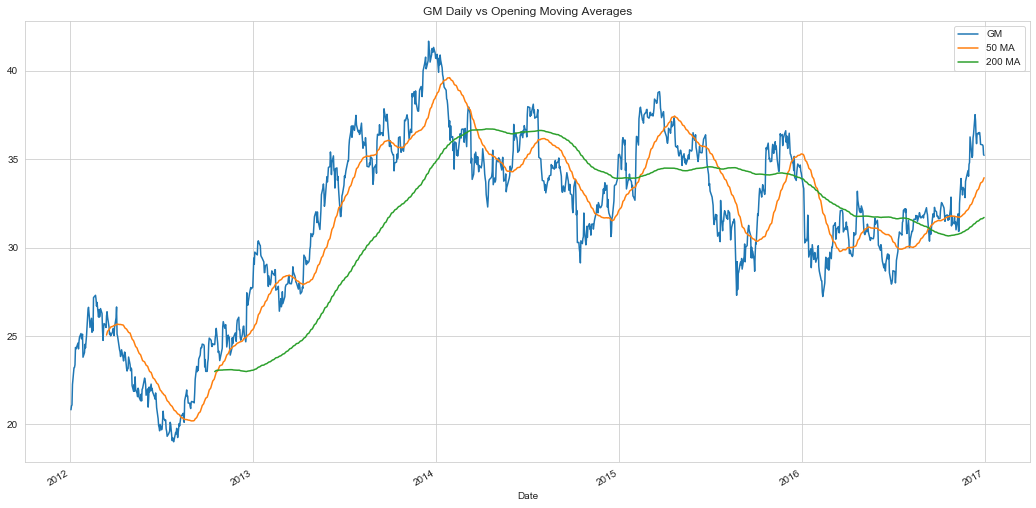

In [21]:
plt.figure(figsize=(18,9))
GM['Open'].plot(label='GM')
GM['Open'].rolling(window=50).mean().plot(label='50 MA')
GM['Open'].rolling(window=200).mean().plot(label='200 MA')
label = plt.legend()
plt.title('GM Daily vs Opening Moving Averages')

In [22]:
#Seeing if these stocks are related, we can use imported scatter matrix from pandas

In [23]:
from pandas.plotting import scatter_matrix

In [25]:
type(TSLA['Open'])

pandas.core.series.Series

In [34]:
opening_dict = {'TSLA Open':TSLA['Open'], 'F Open':F['Open'], 'GM Open':GM['Open']}#Make a dict of opening prices

In [35]:
opening_df = pd.DataFrame(opening_dict)#Make a df from dict

In [37]:
opening_df.head()

,TSLA Open,F Open,GM Open
Date,,,
2012-01-03,28.940001,11.00,20.830000
2012-01-04,28.209999,11.15,21.049999
2012-01-05,27.760000,11.33,21.100000
2012-01-06,27.200001,11.74,22.260000
2012-01-09,27.000000,11.83,23.200001


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f1d0350>,
      dtype=object)

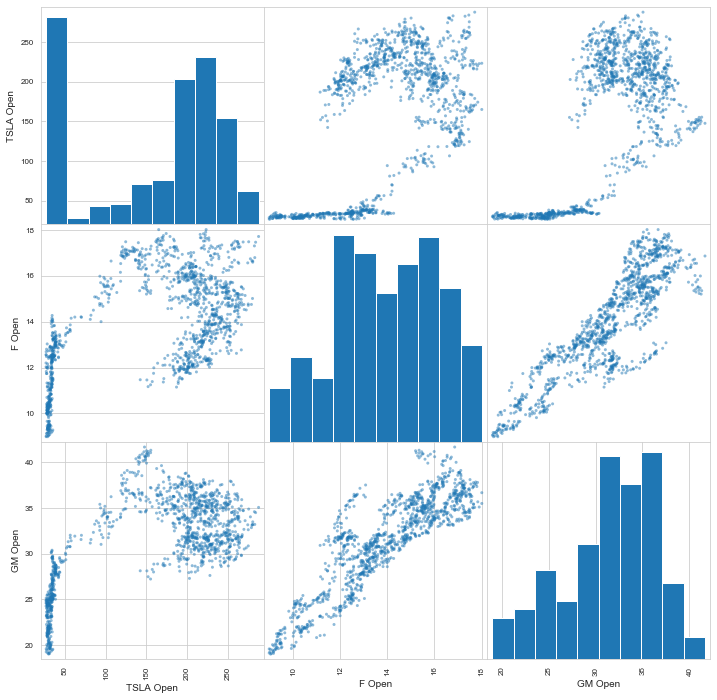

In [57]:
#Using scatter matrix
scatter_matrix(opening_df, figsize=(12,12), diagonal='hist')

In [ ]:
#Clear correlation between F and GM, Tesla is way off!

In [49]:
#Looking at candlestick plots for January
TSLA.loc['2012-01'].iplot(kind='candle')

In [50]:
F.loc['2012-01'].iplot(kind='candle')

In [51]:
GM.loc['2012-01'].iplot(kind='candle')

In [62]:
#Now time for some basic financial analysis
#Adding 'returns' column to each DF

In [67]:
TSLA['returns']=TSLA['Close'].pct_change()
F['returns']=F['Close'].pct_change()
GM['returns']=GM['Close'].pct_change()

In [71]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


Text(0.5, 1.0, 'Tesla Returns Histogram')

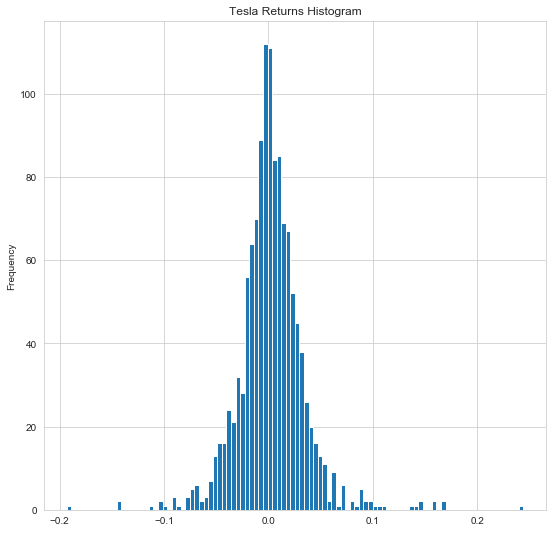

In [109]:
#Plotting Tesla Returns

TSLA['returns'].plot.hist(bins=100, figsize=(9,9))
plt.title('Tesla Returns Histogram')

Text(0.5, 1.0, 'Ford Returns Histogram')

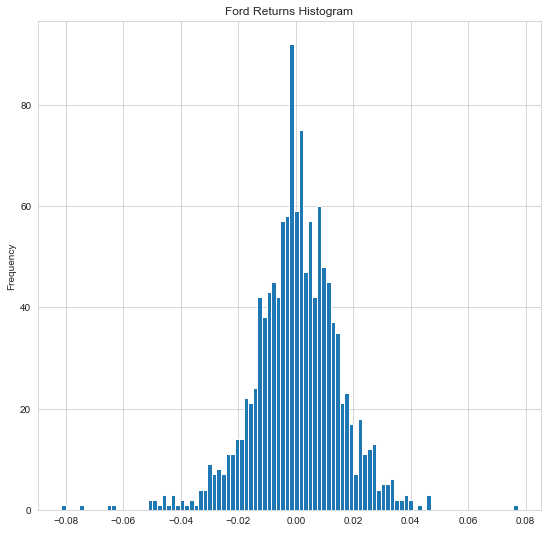

In [111]:
#Plotting Ford Returns

F['returns'].plot.hist(bins=100, figsize=(9,9))
plt.title('Ford Returns Histogram')

Text(0.5, 1.0, 'GM Returns Histogram')

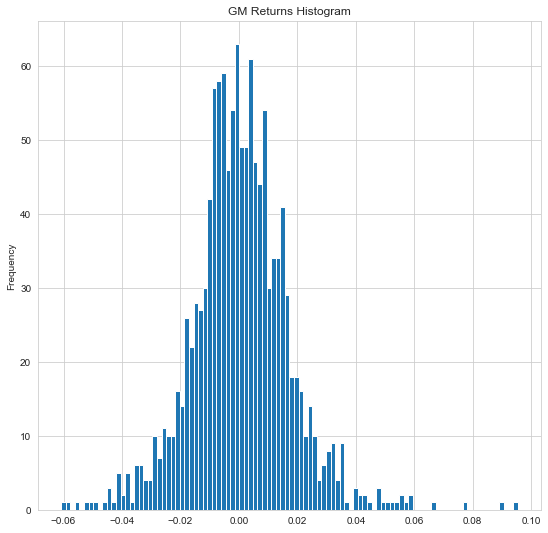

In [112]:
#Plotting GM Returns

GM['returns'].plot.hist(bins=100, figsize=(9,9))
plt.title('GM Returns Histogram')

Text(0.5, 1.0, 'Volatility comparison')

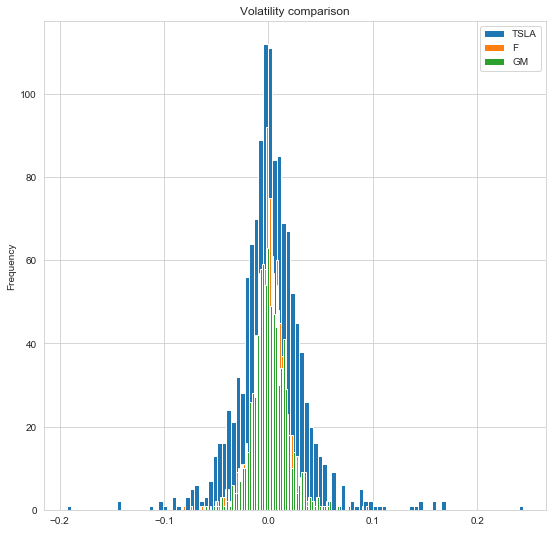

In [115]:
#Plotting all on same figure:
plt.figure(figsize=(18,9))
TSLA['returns'].plot.hist(bins=100, figsize=(9,9), label='TSLA')
F['returns'].plot.hist(bins=100, figsize=(9,9), label='F')
GM['returns'].plot.hist(bins=100, figsize=(9,9), label='GM')
label = plt.legend()
plt.title('Volatility comparison')

In [94]:
#Can be seen tha Tesla is most volatile, showing greater percent changes both up and down

Text(0.5, 1.0, 'Volatility comparison')

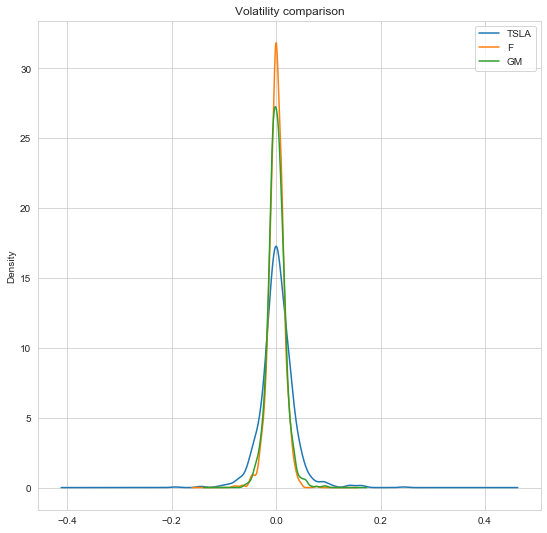

In [96]:
#KDE plot
#Plotting all on same figure:
plt.figure(figsize=(18,9))
TSLA['returns'].plot.kde(figsize=(9,9), label='TSLA')
F['returns'].plot.kde(figsize=(9,9), label='F')
GM['returns'].plot.kde(figsize=(9,9), label='GM')
label = plt.legend()
plt.title('KDE Volatility comparison')

In [97]:
#Again, widest KDE shows highest volatility

In [100]:
#KDE plot
#Plotting all on same figure:
#Need to combine all returns
returns_df = pd.DataFrame

In [103]:
returns_df = pd.concat([TSLA['returns'],F['returns'],GM['returns']],axis=1)

In [105]:
returns_df.columns = ['TSLA returns','F returns', 'GM returns']

In [106]:
returns_df.head()

,TSLA returns,F returns,GM returns
Date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,-0.013177,0.015274,0.004751
2012-01-05,-0.021292,0.025664,0.048227
2012-01-06,-0.007743,0.010354,0.033829
2012-01-09,0.012635,0.007686,-0.003490


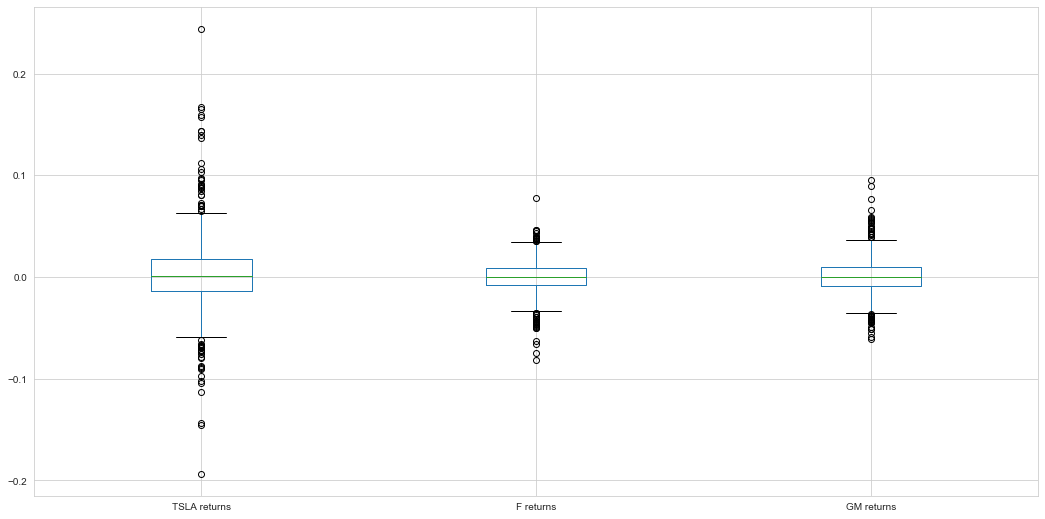

In [108]:
#Now we can do a boxplot
returns_df.boxplot(figsize=(18,9))

In [116]:
#Notice higher variance of Tesla

In [117]:
#To see how linked the car industry is, we can compare the daily returns data for each brand

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30f3a190>,
      dtype=object)

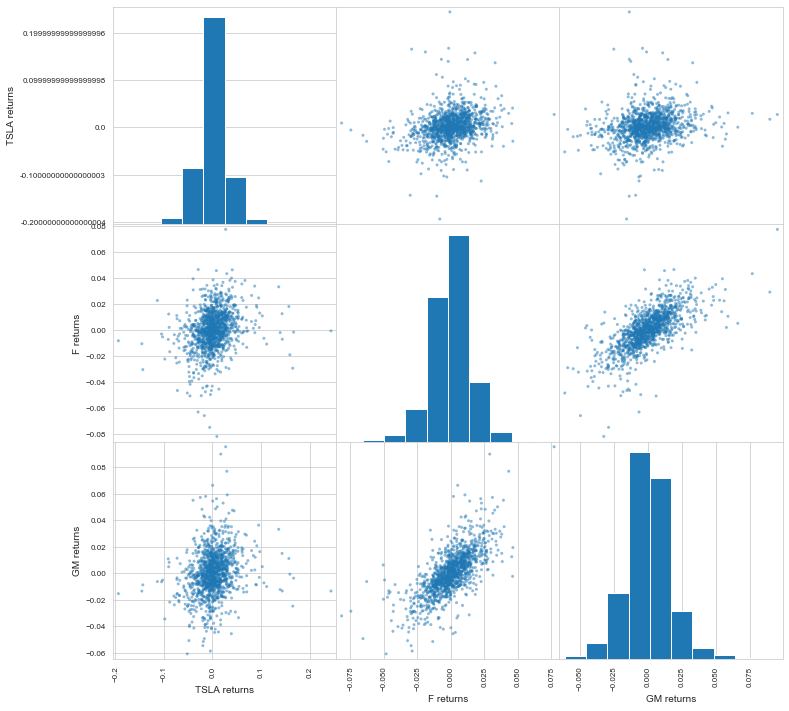

In [118]:
#Using scatter matrix
scatter_matrix(returns_df, figsize=(12,12), diagonal='hist')

In [119]:
#Daily returns of F and GM show some correlation, whereas Tesla does not -
#This implies Tesla is more of a tech company than a car company...

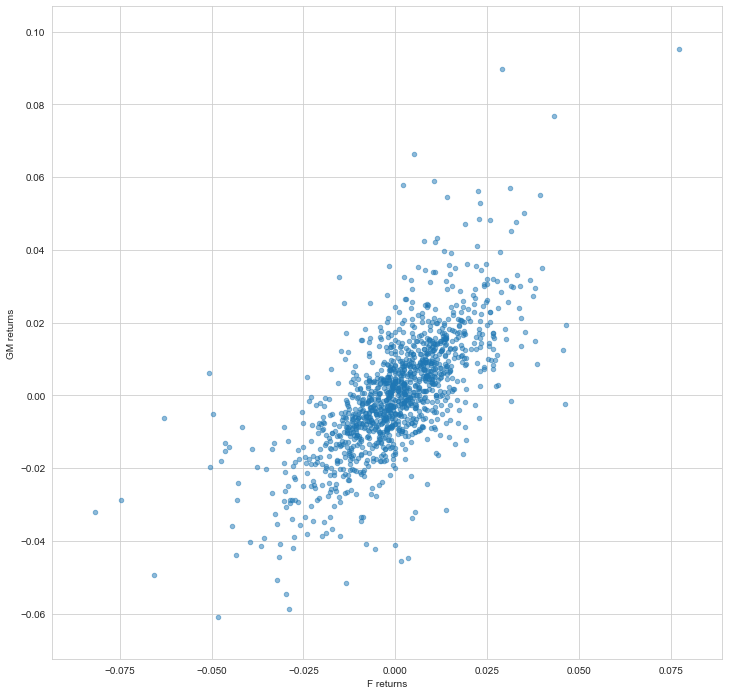

In [122]:
returns_df.plot(kind='scatter',x='F returns', y = 'GM returns', alpha = 0.5,figsize=(12,12))

In [123]:
#Now we can assess the cumulative daily return for each stock.
#Adding this column to each Stock:

In [125]:
TSLA['Cumulative daily return']= (1 + TSLA['returns']).cumprod()
F['Cumulative daily return']= (1 + F['returns']).cumprod()
GM['Cumulative daily return']= (1 + GM['returns']).cumprod()

In [126]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative daily return
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,0.986823
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,0.965812
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,0.958333
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.970442


In [127]:
#We can now plot these agaisnt each other for each car company

Text(0.5, 1.0, 'Cumulative daily return')

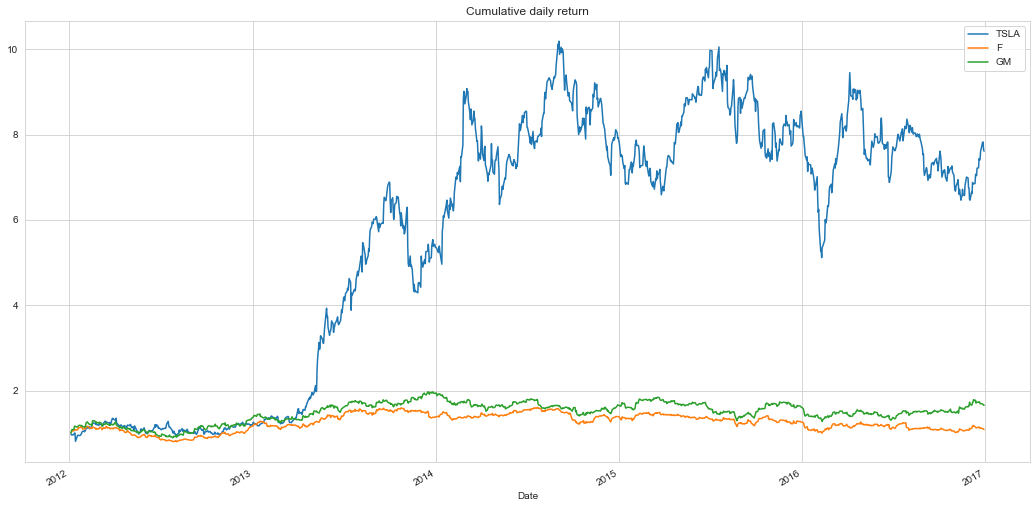

In [128]:
#Comparing each stock's opening price
plt.figure(figsize=(18,9))
TSLA['Cumulative daily return'].plot(label='TSLA')
F['Cumulative daily return'].plot(label='F')
GM['Cumulative daily return'].plot(label='GM')
label = plt.legend()
plt.title('Cumulative daily return')